w =  [[-33.73541021]
 [  0.55920496]]


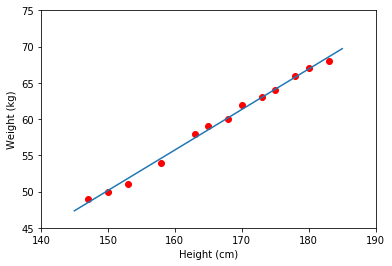

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)
Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


In [2]:
from __future__ import division, print_function, unicode_literals

# To support both python 2 and python 3
#from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data
'''plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()'''
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)  # A=Xbar.T . Xbar
b = np.dot(Xbar.T, y)  # b = Xbar.T . y
# pseudo inverse A = np.linalg.pinv(A)
w = np.dot(np.linalg.pinv(A), b)  # w=A^(-1) . b
print('w = ', w)
# w=[w_0;w_1]
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')     # data
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()
# Predict
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

##################### Use Scikit Learn
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)
